# Clusterização de Documentos

Clusterizar documentos é uma das aplicações mais comuns dos algoritmos de clusterização. Nesse problema vamos clusterizar artigos publicados no Daily Kos, um site de notícias políticas norte americana com um ponto de vista progressista. Este site foi fundado por Markos Moulitsas em 2002 e atualmente conta com centenas de milhares de visitas por dia.

O arquivo dailykos.csv contem dados de 3430 notícias postadas no site. Esses artigos foram postados em 2004, no período da eleição presidencial dos Estados Unidos. Os candidatos eram George W. Bush (pelo partido republicano) e John Kerry (democrata) e um dos principais temas do debate político na época era a invasão do Iraque (em 2003).

Cada variável do dataset é uma palavra que apareceu no mínimo em 50 artigos diferentes (1545 palavras no total). O valor da variável é o número de vezes que essa variável apareceu no dataset.


# Bibliotecas

In [1]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings

#Pre_processing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Cluster
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
# from sklearn.metrics.cluster import rand_score

#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Metricas e visualização e otimização
# from sklearn import metrics
from sklearn.model_selection import train_test_split,learning_curve,KFold, StratifiedKFold, LeaveOneOut, cross_validate, validation_curve, ParameterGrid, ParameterSampler, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.model_selection import LearningCurve



! pip install kneed
from kneed import KneeLocator
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#Word_Cloud
# !pip install -U pillow
import PIL
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from IPython.display import Image


warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#leitura do df
df = pd.read_csv("https://raw.githubusercontent.com/abnr/ml-data/main/dailykos.csv")
df.head()

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,accomplish,account,accurate,accusations,achieve,acknowledge,act,action,active,activist,actual,add,added,addition,address,admin,administration,admit,advance,advantage,advertise,advised,affair,affect,affiliate,afghanistan,afraid,afternoon,age,agencies,...,wide,wife,william,win,wingnut,winner,wisconsin,witness,woes,woman,women,won,wonderful,wont,word,worked,worker,worried,worse,worst,worth,wouldnt,wouldve,wound,write,writer,written,wrong,wrote,yahoo,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0


In [3]:
# função para gerar a word cloud
def word_cloud (df):
  list_sum = []
  for column in df:
    column_sum = df[column].sum()
    list_sum.append(column_sum)
  column_word = df.columns

  word_cloud_df = pd.DataFrame()
  word_cloud_df['column_word'] = column_word
  word_cloud_df['list_sum'] =list_sum
  word_cloud_df.sort_values(by = 'list_sum', ascending= False, inplace= True)
  wcd = word_cloud_df.set_index('column_word').to_dict()['list_sum']
  print('dict descending', wcd)

  wc = WordCloud(background_color="white", random_state= 42)
  # generate word cloud
  wc.generate_from_frequencies(wcd)
  wc.to_file('df.png')

  # from IPython.display import Image
  image = Image('df.png' ,width=600, height= 300)
  return image


dict descending {'bush': 7939, 'kerry': 5293, 'democrat': 4853, 'poll': 4818, 'november': 3781, 'republican': 3550, 'vote': 3178, 'state': 3035, 'elect': 2865, 'house': 2493, 'senate': 2480, 'war': 2463, 'campaign': 2402, 'general': 2380, 'iraq': 2301, 'time': 2225, 'presided': 2181, 'race': 2116, 'dean': 2062, 'voter': 1866, 'nation': 1754, 'parties': 1732, 'candidate': 1726, 'challenge': 1722, 'people': 1685, 'political': 1667, 'primaries': 1664, 'report': 1632, 'administration': 1627, 'year': 1602, 'media': 1469, 'percent': 1421, 'american': 1378, 'support': 1291, 'win': 1251, 'john': 1233, 'news': 1226, 'number': 1198, 'lead': 1167, 'edward': 1145, 'governor': 1080, 'clark': 1060, 'issue': 1027, 'gop': 964, 'official': 938, 'million': 902, 'electoral': 893, 'call': 881, 'attack': 874, 'dem': 858, 'plan': 843, 'result': 843, 'countries': 838, 'account': 829, 'money': 783, 'white': 783, 'force': 772, 'question': 769, 'job': 766, 'power': 758, 'running': 739, 'iraqi': 734, 'showed': 7

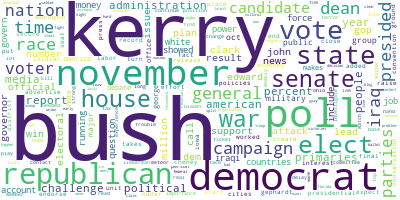

In [4]:
# Word cloud do dataset original
word_cloud(df)

In [5]:
df.duplicated().sum()

0

In [6]:
#Sem valores nulos
for column in df:
  if df[column].isnull().sum() >0:
    print(column)

In [7]:
df_minmax = MinMaxScaler().fit_transform(df)

In [8]:
#PCA

In [9]:
# instanciando o modelo
pca2 = PCA(n_components = 2)

# aplicando o PCA
df_pca2 = pca2.fit_transform(df_minmax)
pca_df2 = pd.DataFrame(df_pca2,columns=['pca_1','pca_2'])

Clusterização

In [10]:
#Kmeans

1 10312.120034303505
2 1548.0832487252978
3 103.55180257452137
4 100.18060401530221
5 72.77713668514889
6 98.29475441569886
7 62.650181928028694
8 97.72683437566617
9 97.32677784068605
10 97.33613375965669


Text(0, 0.5, 'WSS')

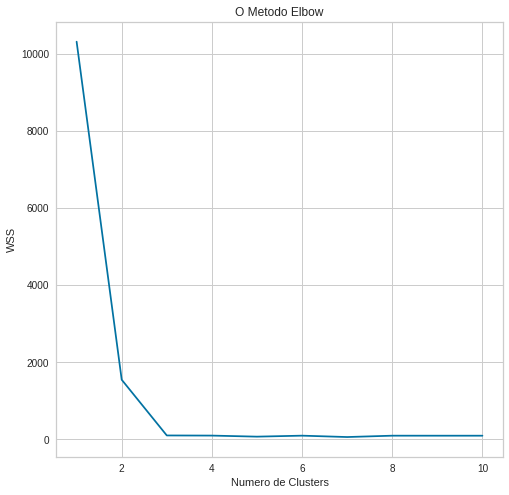

In [11]:
plt.figure(figsize=(8,8))

# plotando o gráfico do método elbow
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(pca_df2)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares

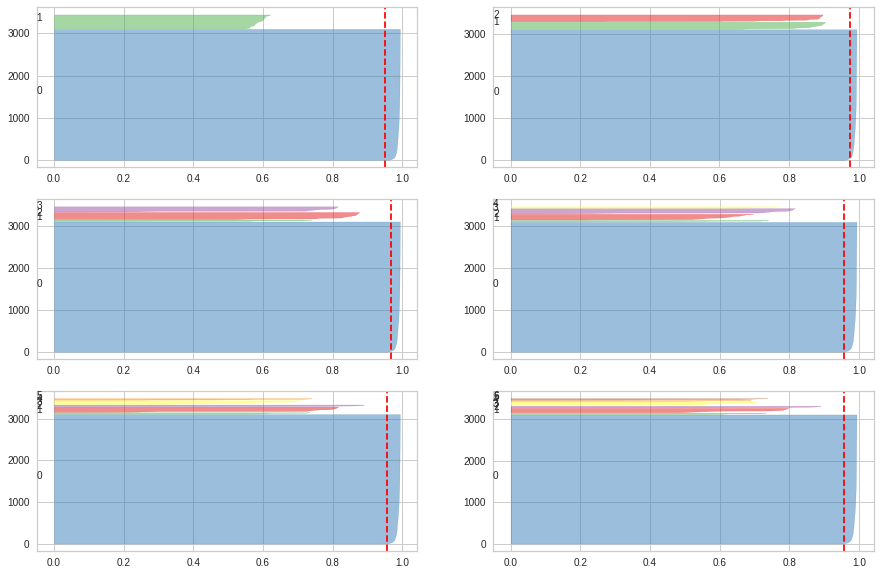

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(15,10))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(pca_df2)  

In [13]:
# Foram escolhidos 2 clusters pelo método do cotovelo(elbow). Mais a frente será comentado sobre o método silhouette

In [14]:
# Inicializando KMeans
kmeans = KMeans(n_clusters=2)
# Fitting com inputs
kmeans = kmeans.fit(pca_df2)
# Predict dos clusters
labels = kmeans.predict(pca_df2)
# Cluster centers
C = kmeans.cluster_centers_

In [15]:
#Dataset com as colunas dos diferentes clusters e os dados originais, porque precisaremos deles para fazer a nuvem de palavras
df_cluster = df.copy()

In [67]:
df_cluster['km_cluster'] = labels
df_cluster.head()

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,accomplish,account,accurate,accusations,achieve,acknowledge,act,action,active,activist,actual,add,added,addition,address,admin,administration,admit,advance,advantage,advertise,advised,affair,affect,affiliate,afghanistan,afraid,afternoon,age,agencies,...,wife,william,win,wingnut,winner,wisconsin,witness,woes,woman,women,won,wonderful,wont,word,worked,worker,worried,worse,worst,worth,wouldnt,wouldve,wound,write,writer,written,wrong,wrote,yahoo,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone,km_cluster
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0


In [19]:
#Df dos valores de pca e os clusters
pca_df2_clusters = pca_df2.copy()
pca_df2_clusters['km_cluster'] =  labels
pca_df2_clusters.head(10)

,pca_1,pca_2,km_cluster
0,-0.518065,-0.008992,0
1,-0.546288,-0.000517,0
2,4.401756,2.446274,1
3,-0.418992,0.035194,0
4,-0.493744,0.045744,0
5,-0.545206,-0.016589,0
6,-0.520006,0.018829,0
7,-0.532761,-0.017661,0
8,-0.539431,-0.016038,0
9,-0.547810,-0.017577,0


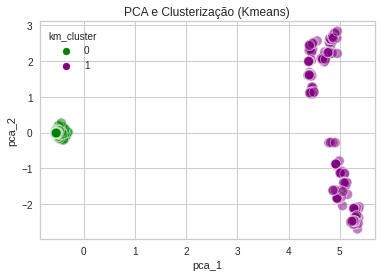

In [29]:
#plot dos clusters
fig = sns.scatterplot(x="pca_1", y="pca_2", data=pca_df2_clusters, hue = 'km_cluster', palette=['green','purple'], s=100, alpha=.5)
plt.title('PCA e Clusterização (Kmeans)')
fig

dict descending {'bush': 6917, 'kerry': 4503, 'democrat': 3895, 'poll': 3207, 'state': 2775, 'republican': 2631, 'elect': 2291, 'campaign': 2229, 'iraq': 2157, 'time': 2068, 'presided': 2029, 'war': 1981, 'dean': 1952, 'general': 1840, 'vote': 1705, 'senate': 1699, 'house': 1664, 'parties': 1603, 'candidate': 1580, 'race': 1577, 'nation': 1577, 'people': 1549, 'administration': 1509, 'year': 1487, 'report': 1441, 'political': 1393, 'american': 1298, 'voter': 1274, 'percent': 1270, 'primaries': 1207, 'support': 1205, 'john': 1155, 'news': 1135, 'win': 1073, 'number': 1065, 'media': 1054, 'edward': 1026, 'clark': 991, 'issue': 948, 'gop': 875, 'lead': 861, 'official': 852, 'million': 849, 'call': 823, 'attack': 820, 'countries': 778, 'result': 773, 'money': 722, 'job': 718, 'white': 716, 'question': 704, 'showed': 669, 'govern': 657, 'iraqi': 655, 'military': 654, 'group': 651, 'include': 643, 'major': 635, 'plan': 634, 'america': 633, 'public': 629, 'force': 619, 'oct': 614, 'debate': 6

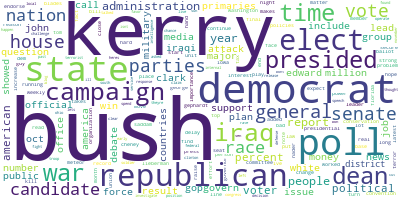

In [30]:
# Word cloud do Cluster 0 usando kmeans
word_cloud(df_cluster.loc[df_cluster['km_cluster'] == 0])

dict descending {'november': 3432, 'poll': 1611, 'vote': 1473, 'challenge': 1366, 'bush': 1022, 'democrat': 958, 'republican': 919, 'house': 829, 'kerry': 790, 'senate': 781, 'governor': 700, 'electoral': 694, 'account': 678, 'voter': 592, 'elect': 574, 'general': 540, 'race': 539, 'war': 482, 'primaries': 457, 'contact': 425, 'media': 415, 'sunzoo': 406, 'experience': 368, 'power': 364, 'dem': 359, 'economy': 355, 'create': 350, 'advertise': 347, 'labor': 346, 'ticket': 341, 'scoop': 341, 'select': 341, 'dkosopedia': 340, 'cultural': 339, 'needed': 339, 'located': 337, 'steal': 336, 'split': 336, 'kossacks': 336, 'straight': 335, 'faq': 335, 'homepage': 335, 'calculate': 334, 'section': 334, 'store': 333, 'recommend': 333, 'philly': 333, 'menu': 333, 'midday': 332, 'ourcongressorg': 332, 'watchers': 332, 'meter': 332, 'username': 332, 'endspan': 331, 'function.': 331, 'asap': 331, 'startspan': 331, 'dryfly': 331, 'openhttpwwwedwardsforprezcomdailykoshtml': 331, 'login': 331, 'republic

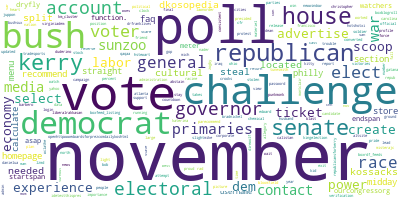

In [31]:
# Word cloud do Cluster 1 usando cluster hierárquico
word_cloud(df_cluster.loc[df_cluster['km_cluster'] == 1])

O método escolhido foi o método k_means, com 2 clusters. 
Analizando o word cloud de cada cluster, tem-se:

- Cluster 0 : é mais denso de palavras e trata mais dos candidatos na disputa eleitoral, com o ranking de palavras mais frequentes tendo 'bush' e 'kerry' nas primeiras posições
- Cluster 1 trata da eleição em si, com os termos 'november', 'pool', 'vote' mais frequentes

Ainda segundo o gráfico dos clusters (abaixo repetido) parece haver mais um cluster, também olhando pelo gráfico da sillhoueta parecem haver 3 clusters, então será feito kmeans com 3 clusters

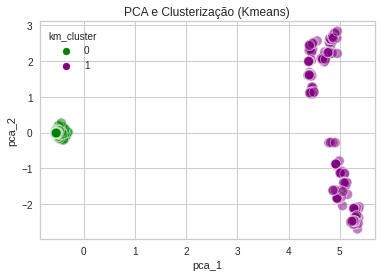

In [33]:
#plot dos clusters
fig = sns.scatterplot(x="pca_1", y="pca_2", data=pca_df2_clusters, hue = 'km_cluster', palette=['green','purple'], s=100, alpha=.5)
plt.title('PCA e Clusterização (Kmeans)')
fig

In [34]:
# Inicializando KMeans
kmeans_3 = KMeans(n_clusters=3)
# Fitting com inputs
kmeans_3 = kmeans_3.fit(pca_df2)
# Predict dos clusters
labels_3 = kmeans_3.predict(pca_df2)
# Cluster centers
C = kmeans.cluster_centers_

In [35]:
#Dataset com as colunas dos diferentes clusters e os dados originais, porque precisaremos deles para fazer a nuvem de palavras
df_cluster_3 = df.copy()

In [37]:
df_cluster_3['km_cluster'] = labels_3
df_cluster_3.head(10)

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,accomplish,account,accurate,accusations,achieve,acknowledge,act,action,active,activist,actual,add,added,addition,address,admin,administration,admit,advance,advantage,advertise,advised,affair,affect,affiliate,afghanistan,afraid,afternoon,age,agencies,...,wife,william,win,wingnut,winner,wisconsin,witness,woes,woman,women,won,wonderful,wont,word,worked,worker,worried,worse,worst,worth,wouldnt,wouldve,wound,write,writer,written,wrong,wrote,yahoo,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone,km_cluster
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [39]:
#Df dos valores de pca e os clusters em diferentes métodos
pca_df2_clusters_3 = pca_df2.copy()
pca_df2_clusters_3['km_cluster'] =  labels_3
pca_df2_clusters_3.head(10)

,pca_1,pca_2,km_cluster
0,-0.518065,-0.008992,1
1,-0.546288,-0.000517,1
2,4.401756,2.446274,2
3,-0.418992,0.035194,1
4,-0.493744,0.045744,1
5,-0.545206,-0.016589,1
6,-0.520006,0.018829,1
7,-0.532761,-0.017661,1
8,-0.539431,-0.016038,1
9,-0.547810,-0.017577,1


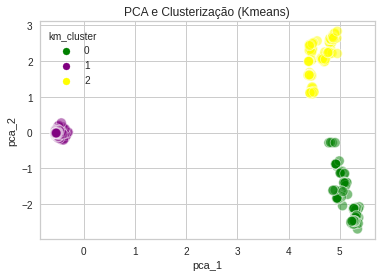

In [42]:
#plot dos 3 clusters
fig_1 = sns.scatterplot(x="pca_1", y="pca_2", data=pca_df2_clusters_3, hue = 'km_cluster', palette=['green','purple', 'yellow'], s=100, alpha=.5)
plt.title('PCA e Clusterização (Kmeans)')
fig_1

dict descending {'november': 1711, 'poll': 822, 'challenge': 667, 'democrat': 495, 'vote': 434, 'house': 411, 'republican': 405, 'bush': 393, 'senate': 368, 'governor': 343, 'electoral': 338, 'account': 330, 'kerry': 289, 'turnout': 271, 'primaries': 268, 'ground': 256, 'general': 253, 'contact': 252, 'war': 248, 'trouble': 243, 'parecommend': 241, 'duderino': 241, 'race': 226, 'exit': 214, 'political': 207, 'voter': 194, 'lead': 192, 'media': 191, 'elect': 186, 'power': 183, 'economy': 181, 'dem': 174, 'labor': 172, 'updated': 172, 'create': 171, 'dkosopedia': 170, 'scoop': 168, 'advertise': 167, 'kossacks': 167, 'experience': 167, 'needed': 166, 'steal': 166, 'select': 166, 'homepage': 166, 'profile': 166, 'located': 165, 'cultural': 165, 'menu': 164, 'faq': 164, 'store': 164, 'straight': 164, 'ticket': 164, 'ourcongressorg': 163, 'consistent': 163, 'section': 163, 'recommend': 163, 'calculate': 163, 'midday': 163, 'blast': 163, 'split': 163, 'username': 163, 'endspan': 162, 'watcher

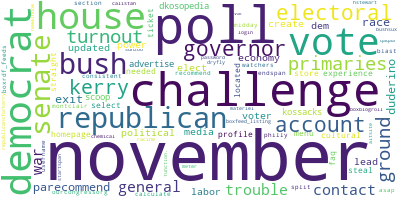

In [63]:
# Word cloud do Cluster 0 usando kmeans
word_cloud(df_cluster_3.loc[df_cluster_3['km_cluster'] == 0])

dict descending {'bush': 6917, 'kerry': 4503, 'democrat': 3895, 'poll': 3207, 'km_cluster': 3099, 'state': 2775, 'republican': 2631, 'elect': 2291, 'campaign': 2229, 'iraq': 2157, 'time': 2068, 'presided': 2029, 'war': 1981, 'dean': 1952, 'general': 1840, 'vote': 1705, 'senate': 1699, 'house': 1664, 'parties': 1603, 'candidate': 1580, 'race': 1577, 'nation': 1577, 'people': 1549, 'administration': 1509, 'year': 1487, 'report': 1441, 'political': 1393, 'american': 1298, 'voter': 1274, 'percent': 1270, 'primaries': 1207, 'support': 1205, 'john': 1155, 'news': 1135, 'win': 1073, 'number': 1065, 'media': 1054, 'edward': 1026, 'clark': 991, 'issue': 948, 'gop': 875, 'lead': 861, 'official': 852, 'million': 849, 'call': 823, 'attack': 820, 'countries': 778, 'result': 773, 'money': 722, 'job': 718, 'white': 716, 'question': 704, 'showed': 669, 'govern': 657, 'iraqi': 655, 'military': 654, 'group': 651, 'include': 643, 'major': 635, 'plan': 634, 'america': 633, 'public': 629, 'force': 619, 'oc

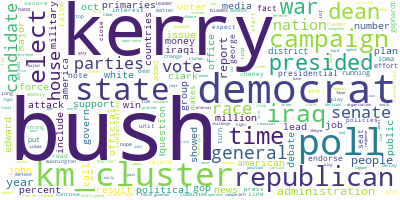

In [65]:
# Word cloud do Cluster 1 usando kmeans
word_cloud(df_cluster_3.loc[df_cluster_3['km_cluster'] == 1])

dict descending {'november': 1721, 'vote': 1039, 'poll': 789, 'challenge': 699, 'bush': 629, 'republican': 514, 'kerry': 501, 'democrat': 463, 'house': 418, 'senate': 413, 'voter': 398, 'elect': 388, 'governor': 357, 'electoral': 356, 'account': 348, 'km_cluster': 338, 'race': 313, 'cities': 301, 'general': 287, 'sunzoo': 244, 'war': 234, 'media': 224, 'experience': 201, 'primaries': 189, 'dem': 185, 'plan': 184, 'soldier': 181, 'power': 181, 'advertise': 180, 'create': 179, 'ticket': 177, 'select': 175, 'nov': 174, 'protest': 174, 'labor': 174, 'economy': 174, 'cultural': 174, 'split': 173, 'contact': 173, 'needed': 173, 'scoop': 173, 'located': 172, 'faq': 171, 'calculate': 171, 'philly': 171, 'straight': 171, 'section': 171, 'stolen': 171, 'meter': 170, 'christopher': 170, 'watchers': 170, 'dkosopedia': 170, 'steal': 170, 'recommend': 170, 'password': 169, 'function.': 169, 'openhttpwwwedwardsforprezcomdailykoshtml': 169, 'var': 169, 'asap': 169, 'endspan': 169, 'menu': 169, 'newwin

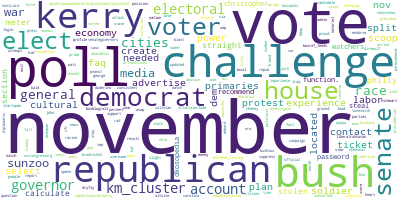

In [66]:
# Word cloud do Cluster 2 usando kmeans
word_cloud(df_cluster_3.loc[df_cluster_3['km_cluster'] == 2])

O método escolhido nesta etapa foi o método k_means, com 3 clusters. 
Analizando o word cloud de cada cluster, tem-se:
- Cluster 0 e 2 : bem parecidos e tratam da eleição em si, e vendo o ranking das palavras quais aparecem mais a diferença entre os 2 clusters é:

  - Cluster 0 : 'democrat' fica a frente de 'republican'

  - Cluster 2 : 'republican' fica a frente de 'democrat' 


- Cluster 1 : é mais denso de palavras e trata mais dos candidatos na disputa eleitoral, com o ranking de palavras mais frequentes tendo 'bush' e 'kerry' nas primeiras posições





  


#Conclusões:
- Utilizando 2 clusters temos clusters bem distintos: um dos candidatos e outro das eleições em si

- Com 3 clusters há uma subdivisão do cluster de palavras da eleições